# QTM 151-1 Final Project
# Group Member: Karl Zhou, Alex Mao, Yufan Wu, Vicki Lin;
# 8 December 2023

# Introduction

<font size = "5">
What is F1?<br>
<font size = "3">

Formula One (F1) racing is a premier motorsport renowned for its high-speed races, advanced automotive technology, and global fan base. Originating in 1950, F1 has become the top standard in racing, blending the drivers' skills, advanced engineering, and the teams' strategies. The foundation of our project is an expansive dataset that depicts the history of F1 races since 1950, encompassing data about drivers, teams, races, and results. This rich dataset offers a unique lens through which we can examine the elements contributing to competitive success. <br><br>

<font size = "5">
Our Research Questions<br>
<font size = "3">

The main goal of our research is to identify the characteristics that correlate with the success of F1 drivers. We are specifically focusing on three major aspects: 1) the relationship between a driver's age and their mean rank in races, 2) how the duration of pit stops influences a driver's rank, and 3) the impact of a driver's nationality on their race ranking. These factors are particularly intriguing because they involve the physical and mental attributes of the drivers, the strategic decisions made by teams, and the environmental influences that might affect a driver's performance. By analyzing these factors, we aim to uncover patterns and trends that could provide deeper insights into what makes a successful Formula One driver. This research is not only relevant for analyzing F1 racing performances and history but also contributes to the broader understanding of how various elements intertwine in competitive environments.<br><br>

<font size = "5">
Structure<br>
<font size = "3">

Our project is divided into three distinct sections. The first section analyzes the link between drivers’ ages and their racing outcomes, using data from the years 2020, 2015, and 2012 to minimize confounding effects. The second section focuses on the relationship between the duration of drivers' pit stops and their average points, with these points being a strong indicator of overall performance. Finally, the third section explores the relationship between a driver's nationality and their mean ranking, aiming to discover if there's a significant connection between a driver's origin and their success in Formula One. Our research into Formula One racing has yielded some intriguing results. First of all, we found that a driver's age does not consistently predict their performance in races, indicating that experience or physical condition related to age are not exclusive determinants of performance. Moreover, our results revealed a clear correlation between longer pit stops and lower average points and that average points earned directly impact the finishing positions. When examining the influence of nationality, we noticed a trend where drivers from certain countries tended to have better average performances. However, considering the multifaceted factors that influence race outcomes, this observation doesn't definitively link nationality to success. We concluded that there are multiple aspects that can affect race performance, and it's important to note that no single factor alone guarantees success. It's a combination of various factors that contribute to the overall outcome.


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates
import numpy as np

<font size = "5">
Dataset Used <br>

<font size = "3">

Among the 14 tables, we used constructor result, constructor, constructor results, constructor standings, drivers, results, lap times, pit stops, and races table for our analysis. We divided these data into groups to answer three different questions. The drivers data and results data are used to answer the first question about the relationship between a driver's age and their mean rank in races. The pit stops, results, and constructor data are used to answer our second research question. The drivers data and results data are then used again to answer the third question. <br>

The drivers table displays drivers’ basic information, such as their date of birth and driver ID. The results table shows the final resolution of each competition and specifications. The races table displays information about each race, such as the year, race ID, and name. The constructors table shows basic information about each constructor, such as their team name and nationality. The constructor result table shows basic information about the constructors’ results ID, points, and race ID. The lap time table details the time spent on each lap for different drivers. The pit stops table details the number of stops and laps for different drivers and other variables involved in it. The constructor standings table shows constructor standing ID and points and wins. <br>

We utilize libraries such as pandas, numpy, and matplotlib.pyplot to import the required data. Following the import, we can carry out certain computations, which include counting the number of rows, filtering the data by specific years or countries, or calculating summary statistics for specific indicators.


In [36]:
constructor_result = pd.read_csv("Formula1-DatasetFull/raw_data/constructor_results.csv")
constructor = pd.read_csv("Formula1-DatasetFull/raw_data/constructors.csv")
drivers = pd.read_csv("Formula1-DatasetFull/raw_data/drivers.csv")
results = pd.read_csv("Formula1-DatasetFull/raw_data/results.csv")
lap_time = pd.read_csv("Formula1-DatasetFull/raw_data/lap_times.csv")
pit_stops = pd.read_csv("Formula1-DatasetFull/raw_data/pit_stops.csv")
races = pd.read_csv("Formula1-DatasetFull/raw_data/races.csv")
constructor_standing=pd.read_csv("Formula1-DatasetFull/raw_data/constructor_standings.csv")

# First Research Question <br>
<font size = "5">
Merging Data <br>
<font size = "3">

For our first question, the subset of 2020 race data from the drivers data is merged with the results data on the raceId key to form merged_age. We used the query method to create a subset of race data for the year 2020 on the races dataset, and the age of the drivers in 2020 is calculated by subtracting the year of birth from 2020, resulting in a new column, age2020. The merged_age dataset is then further merged with the drivers dataset on the driverId key, adding driver information to the race results, including their ages. We convert the rank column to an integer type to make sure the data is in numeric format. The merged dataset is then grouped by age2020, and the mean rank for each age is calculated. This process aims to determine how a driver's age correlates with their mean rank in races. We did the same thing for 2015 and 2012 data. <br><br>
merged_age = pd.merge(subset2015, results, on="raceId")<br>
merged_age = pd.merge(merged_age,drivers, on="driverId")<br>
merged_age["rank"]=merged_age["rank"].astype(int)
<br><br>


<font size = "5">
Data Cleaning <br>
<font size = "3">

The code initially focuses on data cleaning procedures, primarily dealing with the "drivers" dataset. It starts by converting the date of birth information ("dob" column) into birth years ("year" column) using Pandas' `pd.to_datetime()` and `.dt.year` functions. This operation results in the creation of additional columns such as "age2020," "age2015," and "age2012," representing driver ages in specific years (2020, 2015, 2012) derived from their birth years. This step enables the analysis of driver age trends across different periods.

Furthermore, the code handles missing or non-numeric values in the "rank" column by cleaning the data. It replaces instances of "\\N" with NaN (Not a Number) using the `.replace()` method, ensuring consistency and numerical compatibility for subsequent computations involving race ranks.

The code then proceeds to merge datasets like "subset2020," "subset2015," and "subset2012" with other relevant data (such as "results" and "drivers") based on common identifiers like "raceId" and "driverId." These merging operations are crucial for combining race-related information with driver-specific data, facilitating comprehensive analysis.<br><br>

<font size = "5">
Main Columns <br>
<font size = "3">

The datasets being analyzed contain several crucial columns that are important for understanding the dynamics of Formula 1 racing and driver performance. The "dob" column, standing for Date of Birth, contains birthdate information for drivers. This column serves as the basis for deriving birth years and subsequently calculating driver ages in different years. The "year" column represents the birth year of drivers, obtained through the extraction of year information from the "dob" column. We then used 
columns such as "age2020," "age2015," and "age2012" represent the ages of the drivers in those specific years, allowing for the examination of age-related trends and their potential impact on performance.


<BarContainer object of 14 artists>

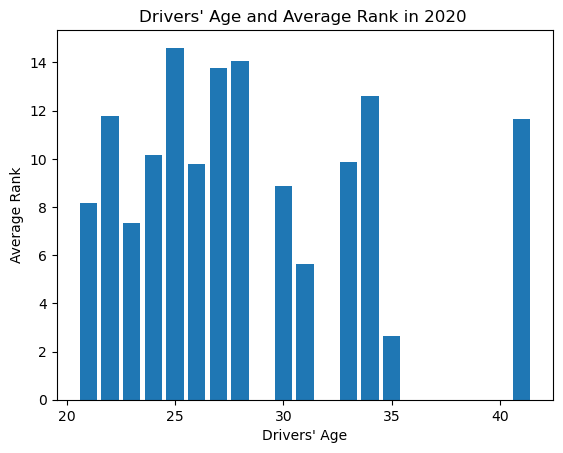

In [42]:
#Step 1. Convert driver dob to year(int)
drivers["date"] = pd.to_datetime(drivers["dob"])
drivers["year"] = drivers["date"].dt.year
drivers["age2020"] = 2020 - drivers["year"]
#2
subset2020=races.query('year==2020')
merged_age = pd.merge(subset2020, results, on="raceId")
merged_age = pd.merge(merged_age,drivers, on="driverId")
merged_age["rank"]=merged_age["rank"].astype(int)
result = merged_age.groupby("age2020").agg(mean_rank=('rank', 'mean'))
result=result.reset_index()
result['age2020']=result['age2020'].astype(int)
plt.title("Drivers' Age and Average Rank in 2020 ")
plt.xlabel("Drivers' Age")
plt.ylabel("Average Rank")
plt.bar("age2020","mean_rank",
         data=result)

<BarContainer object of 12 artists>

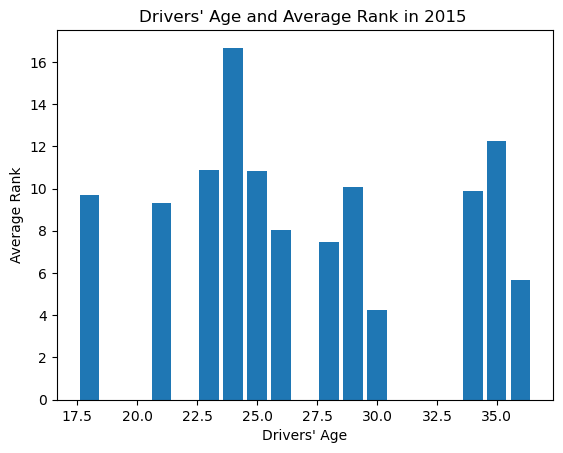

In [43]:
#Step 1. Convert driver dob to year(int)
drivers["date"] = pd.to_datetime(drivers["dob"])
drivers["year"] = drivers["date"].dt.year
drivers["age2015"] = 2015 - drivers["year"]
#2
subset2015=races.query('year==2015')
merged_age = pd.merge(subset2015, results, on="raceId")
merged_age = pd.merge(merged_age,drivers, on="driverId")
merged_age["rank"]=merged_age["rank"].astype(int)
result = merged_age.groupby("age2015").agg(mean_rank=('rank', 'mean'))
result=result.reset_index()
result['age2015']=result['age2015'].astype(int)
plt.title("Drivers' Age and Average Rank in 2015 ")
plt.xlabel("Drivers' Age")
plt.ylabel("Average Rank")
plt.bar("age2015","mean_rank",
         data=result)

<BarContainer object of 15 artists>

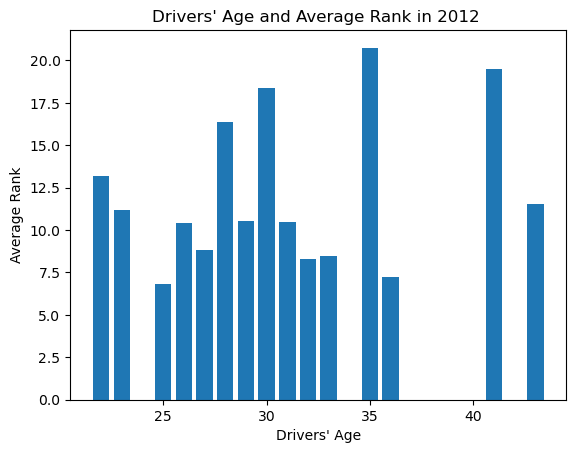

In [44]:
#Step 1. Convert driver dob to year(int)
drivers["date"] = pd.to_datetime(drivers["dob"])
drivers["year"] = drivers["date"].dt.year
drivers["age2012"] = 2012 - drivers["year"]
#2
subset2012=races.query('year==2012')
merged_age = pd.merge(subset2012, results, on="raceId")
merged_age = pd.merge(merged_age,drivers, on="driverId")
merged_age["rank"]=merged_age["rank"].astype(int)
result = merged_age.groupby("age2012").agg(mean_rank=('rank', 'mean'))
result=result.reset_index()
result['age2012']=result['age2012'].astype(int)
plt.title("Drivers' Age and Average Rank in 2012 ")
plt.xlabel("Drivers' Age")
plt.ylabel("Average Rank")
plt.bar("age2012","mean_rank",
         data=result)

<font size = "5">
Results <br>
<font size = "3">

The bar charts represent the relationship between Formula 1 drivers' ages and their average race ranks for the years 2020, 2015, and 2012, respectively. On the x-axis, we have the drivers' age; on the y-axis, we have their average rank in races, with a lower rank indicating better performance. <br>

2020: The distribution appears relatively even, with no clear trend indicating that age strongly correlates with average rank. Drivers around the age of 27 seem to have the lowest mean rank, which could suggest that drivers in this age group performed better in races on average that year. <br><br>
2015: This chart shows a peak at around age 25, where drivers achieved the lowest average rank, suggesting better performance. The other ages show more variability in average rank, with no clear upward or downward trend as age increases or decreases. <br><br>
2012: The chart for 2012 shows a different distribution, with the lowest average ranks occurring at approximately ages 30 and 40. Still, there is no clear upward or downward trend as age increases or decreases. <br><br>

Therefore, we can conclude that there is no consistent trend across all three years that would strongly suggest age is a definitive factor in predicting race performance, even though there are some differences in average ranks across ages in the analyzed years. <br>


# Second Research Question <br>
<font size = "5">
Merging Data<br>
<font size = "3">

For our second question, we performed four merges. We merged the pit_stops dataset with the results dataset on two common keys, driverId and raceId, to combine pit stop information with race results for each driver in the initial merge. We then merged the merged dataset with the constructor dataset on the constructor key. This adds information about the team to which each driver belongs. The dataset is grouped by constructorId and raceId to calculate the total pit stop duration for each team in each race. A further aggregation is then performed to calculate each constructor's average pit stop duration across all races. The third merge is to merge the average pit stop duration data (average_stop) with the constructor dataset again on constructorId to ensure that each team's information is up to date and includes the average stop time. Then, a subset of the constructor_standings dataset is created for races where the raceId is greater than or equal to 841, suggesting this is the range for which pit stop data is available. Here, the performance of each team is aggregated, calculating the maximum number of wins, average points, and average finishing position. After that, we perform the final merge. The performance data is merged with the average pit stop data (average_stop) on constructorId. The resultant dataset (merged5) is then merged with the constructor dataset to add the team names. These merging processes allow for a thorough analysis of how the duration of pit stops correlates with the performance of Formula 1 teams. <br><br>
merged=pd.merge(pit_stops,results,on=["driverId","raceId"])<br>
merged2=pd.merge(merged,
                 constructor,
                 on="constructorId")<br>
merged2["duration_numeric"]=pd.to_numeric(merged2["duration"],errors="coerce")<br>
merged3=pd.merge(average_stop,constructor,on="constructorId")<br>
merged5=pd.merge(average_stop,performance,on="constructorId")<br>
merged6=pd.merge(merged5,constructor[["name","constructorId"]],on="constructorId")
<br><br>

<font size = "5">
Data Cleaning <br>
<font size = "3">
XXXX<br><br>

<font size = "5">
Main Columns <br>
<font size = "3">

The "raceId" column serves as a unique identifier for each race within the Formula 1 season, enabling the merging of race results with individual driver data. Similarly, "driverId" is used to uniquely identify each driver, which is crucial when merging data from sources to maintain accurate records for each driver across multiple datasets. The "rank" column is particularly significant as it indicates the finishing position of drivers in races, a direct measure of performance; data cleansing and statistical analyses are conducted on this column to extract meaningful insights. <br><br>


,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,resultId,constructorId,number,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url,duration_numeric
0,841,153,1,1,17:05:23,26.898,26898,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,26.898
1,841,153,2,17,17:31:06,24.463,24463,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,24.463
2,841,153,3,35,17:59:45,26.348,26348,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,26.348
3,841,67,1,15,17:27:34,25.342,25342,20786,5,18,...,44,11,1:30.836,210.167,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,25.342
4,841,67,2,29,17:49:47,23.100,23100,20786,5,18,...,44,11,1:30.836,210.167,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,23.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1095,840,1,29,15:44:14,23.469,23469,25815,117,18,...,50,8,1:14.831,207.299,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,23.469
9630,1095,840,2,48,16:08:59,23.764,23764,25815,117,18,...,50,8,1:14.831,207.299,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,23.764
9631,1096,840,1,13,17:23:19,21.814,21814,25833,117,18,...,42,9,1:29.620,212.135,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,21.814
9632,1096,840,2,40,18:04:44,21.802,21802,25833,117,18,...,42,9,1:29.620,212.135,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,21.802


,average_stop
constructorId,
1,24.099381
3,24.545251
4,24.297162
5,24.491064
6,23.839084
9,23.615081
10,24.058361
15,24.893743
51,25.596512


,total_wins,average_points,average_pos
constructorId,,,
1,7,93.203320,5.128631
3,1,39.257261,7.568465
4,0,47.075630,6.042017
5,0,26.256983,7.173184
6,6,214.715768,2.705394
9,17,240.168050,2.336100
10,0,60.018987,5.816456
15,0,21.426752,8.101911
51,0,20.132530,7.253012


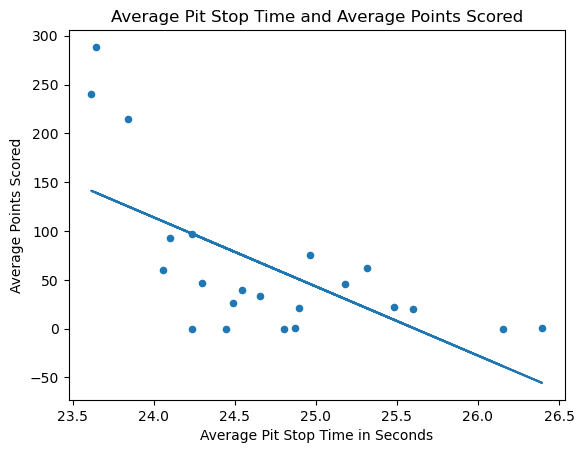

In [51]:
merged=pd.merge(pit_stops,results,on=["driverId","raceId"])

merged2=pd.merge(merged,
                 constructor,
                 on="constructorId")

merged2["duration_numeric"]=pd.to_numeric(merged2["duration"],errors="coerce")
display(merged2)

stop_time=(merged2.groupby(["constructorId","raceId"])
    .agg(total_stop = ("duration_numeric","sum")))

average_stop=(stop_time.groupby("constructorId")
    .agg(average_stop = ("total_stop","mean")))


merged3=pd.merge(average_stop,constructor,on="constructorId")

merged3

merged=pd.merge(pit_stops,results[["raceId","driverId","constructorId"]],on=["driverId","raceId"])
merged2=pd.merge(merged,constructor["constructorId"],on="constructorId")
merged2["duration_numeric"]=pd.to_numeric(merged2["duration"],errors="coerce") #converting the duration column to numeric
average_stop=(merged2.groupby("constructorId")
    .agg(average_stop = ("duration_numeric","mean")))
display(average_stop)

constructor_standings_subset=constructor_standing.query('raceId>=841') #races after the pit_stop dataset is available
performance=(constructor_standings_subset.groupby("constructorId")
    .agg(total_wins = ("wins","max"),
         average_points=("points","mean"),
         average_pos=("position","mean")))
display(performance)

merged5=pd.merge(average_stop,performance,on="constructorId")
merged6=pd.merge(merged5,constructor[["name","constructorId"]],on="constructorId")
merged6

m, b = np.polyfit(merged6["average_stop"], merged6["average_points"], deg=1)
merged6.plot.scatter(x="average_stop",y="average_points")
plt.title("Average Pit Stop Time and Average Points Scored")
plt.xlabel("Average Pit Stop Time in Seconds")
plt.ylabel("Average Points Scored")
plt.plot(merged6["average_stop"], m*merged6["average_stop"] + b)

<font size = "5">
Results <br>
<font size = "3">

The scatter plot indicates a relationship between the average duration of pit stops for Formula 1 teams (x-axis) and their average points scored (y-axis). The downward-sloping line suggests a negative correlation, which means that as the average pit stop duration increases, the average points scored by the teams decrease. This implies that longer pit stops are associated with lower performance, as points in Formula 1 are typically awarded based on finishing positions, and longer pit stops could result in lower finishing positions. The outliers represent exceptional circumstances where pit stop strategy had a different impact due to unique race conditions or driver performance. <br>


# Third Research Question <br>
<font size = "5">
Merging Data <br>
<font size = "3">

For our third question, we merged the drivers dataset with a subset of the results dataset that includes only the driverId and rank columns. The merge is done on the driverId column using a left join, which means all entries in the drivers dataset will be retained, and matching entries from the results dataset will be merged based on the driverId. The drivers_merge dataset is grouped by nationality, and each group's mean rank is calculated. These mean ranks are then sorted in ascending order, so nationalities with the lowest (best) average ranks come first. This analysis helps to visually represent which nationalities, on average, tend to have drivers with better performance in terms of race rankings.<br><br>
drivers_merge = pd.merge(drivers,
                        results[["driverId", "rank"]],
                        on="driverId",
                        how="left")<br>
drivers_merge["rank"] = pd.to_numeric(drivers_merge["rank"], errors = "coerce"<br><br>

<font size = "5">
Data Cleaning <br>
<font size = "3">
XXXX<br><br>

<font size = "5">
Main Columns <br>
<font size = "3">

Another column of interest is "nationality," which captures the national origin of each driver. This column is used to group drivers and evaluate if there's a trend in performance based on the drivers' national backgrounds. By analyzing this column, we can potentially identify whether certain nationalities have a propensity to produce drivers who achieve better average ranks in Formula 1 racing, offering a cultural or regional perspective to the sport's competitive nature. These columns together form a comprehensive analytical approach, seeking to find the factors that contribute to the success of Formula 1 drivers, focusing on the interplay between age, nationality, and strategic decisions such as pit stop durations.
 <br><br>


                   mean_rank
nationality                 
Colombian           6.023810
Monegasque          7.320388
Finnish             8.006579
Australian          8.862408
Spanish             8.940375
Dutch               8.966245
British             9.015593
German              9.629630
Mexican             9.834459
Thai                9.915254
Brazilian          10.342441
Polish             10.530612
Venezuelan         11.812500
Chinese            11.818182
Russian            12.009434
Danish             12.161972
Canadian           12.527778
French             12.578856
Italian            12.864198
New Zealander      12.960000
Swiss              13.039216
Japanese           13.180328
Austrian           14.000000
Belgian            14.548387
Swedish            14.989691
American           15.066667
Indonesian         16.083333
Portuguese         16.416667
Hungarian          18.833333
Indian             18.913793
American-Italian         NaN
Argentine                NaN
Argentine-Ital

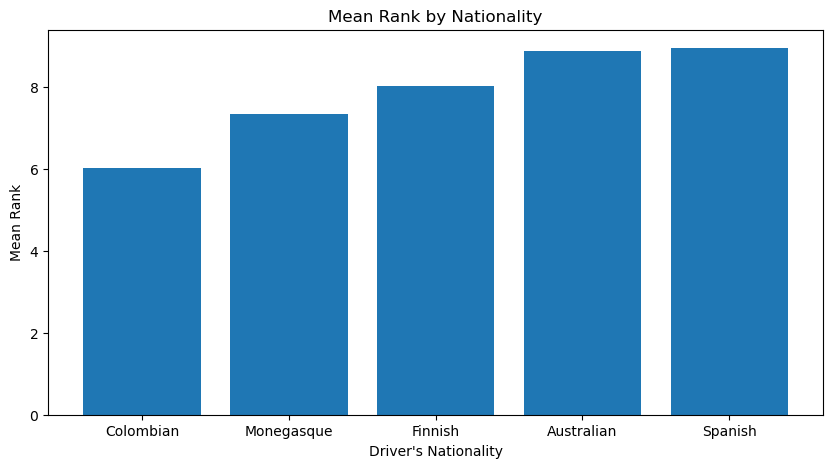

In [41]:
drivers_merge = pd.merge(drivers,
                        results[["driverId", "rank"]],
                        on="driverId",
                        how="left")

drivers_merge["rank"] = pd.to_numeric(drivers_merge["rank"], errors = "coerce")

list_old = ["\\N"]
list_new = [np.nan]
drivers_merge["rank"] = drivers_merge["rank"].replace(list_old, list_new)

print(drivers_merge.groupby("nationality")
                        .agg(mean_rank = ("rank", "mean"))
                        .sort_values("mean_rank", ascending = True))

driver_mean_rank = drivers_merge.groupby("nationality")["rank"].mean().sort_values(ascending=True)
top_5_nation = driver_mean_rank.nsmallest(5)

plt.figure(figsize=(10, 5))
plt.bar(top_5_nation.index, top_5_nation.values)

plt.title("Mean Rank by Nationality")
plt.xlabel("Driver's Nationality")
plt.ylabel("Mean Rank")

plt.show()

<font size = "5">
Results <br>
<font size = "3">

The bar chart shows the mean rank of Formula 1 drivers categorized by their nationality. The y-axis represents the mean rank achieved by drivers, with a lower score indicating better performance, while the x-axis lists various nationalities. From the chart, we can observe that Colombian and Spanish drivers, on average, have a lower mean rank, suggesting relatively better performance in races compared to the other nationalities shown. The Monegasque and Australian drivers have a slightly higher mean rank, indicating a lower average performance based on race rankings. Finnish drivers fall in the middle range in this selection. This visual representation effectively communicates how drivers' performances in races correlate with their nationalities within the dataset analyzed. It is worth noting that these outcomes could be influenced by a range of factors, including the quality of the car, the team's performance, etc. <br><br>


<font size = "5">
Discussion <br>
<font size = "3">

For our first research question, our analysis explored the relationship between drivers' ages and their mean ranks in races for the years 2020, 2015, and 2012, and we found no consistent pattern indicating a strong correlation between age and race performance across these years. While certain ages showed a lower mean rank in some years, suggesting better performance, these did not create a consistent trend over time. This indicates that a driver's age alone is not a reliable predictor of their performance. <br><br>
For our second research question, the scatter plots suggested a negative correlation between the average duration of pit stops and the average points scored by teams, meaning that teams with shorter average pit stop times tended to score higher points, implying that efficient pit stops are crucial to a successful race strategy. However, some outliers suggested that other factors also significantly influence race outcomes.<br><br>
For our third research question, we observed that certain nationalities appeared to have drivers with better average performance in the studied years. However, this does not conclusively establish nationality as a determinant of success due to the various variables that could affect race results.<br><br>
To improve our analysis, we can include more details in the future, such as car specifications and team strategies, which could provide a more in-depth understanding of performance influencers. Also, we can extend the analysis to a broader range of years, which could help in identifying long-term trends that may not be apparent in a shorter time frame. Lastly, in the future, we can build a better model that could analyze the interaction effect between different variables for a trend. <br><br>
In summary, our analyses offer valuable insights but also highlight the complexity of Formula 1 racing, where multiple factors influence outcomes. Future research could build on these findings by integrating more data points and factors and employing advanced analytics better to understand the drivers of success in this competitive sport.<br><br>
